A first implementation of a node-induced subgraph isomorphism counting algorithm, with some toy data to check it works.

In [2]:
import networkx as nx

Toy Graphs

[(0, {'atom': 'H'}), (2, {'atom': 'N'}), (1, {'atom': 'H'}), (3, {'atom': 'C'})]
[(0, 2, {'bonds': 1}), (2, 1, {'bonds': 1}), (2, 3, {'bonds': 2})]


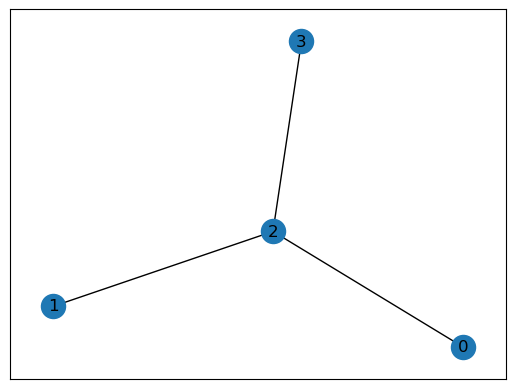

In [86]:
edgelist = [(0, 2), (1, 2), (2, 3)]
A = nx.Graph(edgelist)

A.nodes[0]['atom'] = 'H'
A.nodes[1]['atom'] = 'H'
A.nodes[2]['atom'] = 'N'
A.nodes[3]['atom'] = 'C'

A.edges[0, 2]['bonds'] = 1
A.edges[1, 2]['bonds'] = 1
A.edges[2, 3]['bonds'] = 2

print(A.nodes.data())
print(A.edges.data())
nx.draw_networkx(A, with_labels=True)

[(0, {'atom': 'H'}), (2, {'atom': 'N'}), (1, {'atom': 'H'}), (3, {'atom': 'C'})]
[(0, 2, {'bonds': 2}), (2, 1, {'bonds': 2}), (2, 3, {'bonds': 2})]


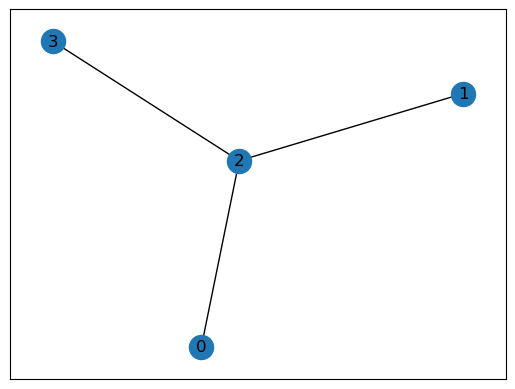

In [87]:
edgelist = [(0, 2), (1, 2), (2, 3)]
B = nx.Graph(edgelist)

B.nodes[0]['atom'] = 'H'
B.nodes[1]['atom'] = 'H'
B.nodes[2]['atom'] = 'N'
B.nodes[3]['atom'] = 'C'

B.edges[0, 2]['bonds'] = 2
B.edges[1, 2]['bonds'] = 2
B.edges[2, 3]['bonds'] = 2

print(B.nodes.data())
print(B.edges.data())
nx.draw_networkx(B, with_labels=True)

[(0, {'atom': 'H'}), (2, {'atom': 'N'}), (1, {'atom': 'H'}), (3, {'atom': 'C'})]
[(0, 2, {'bonds': 1}), (0, 1, {'bonds': 1}), (2, 1, {'bonds': 1}), (2, 3, {'bonds': 2})]


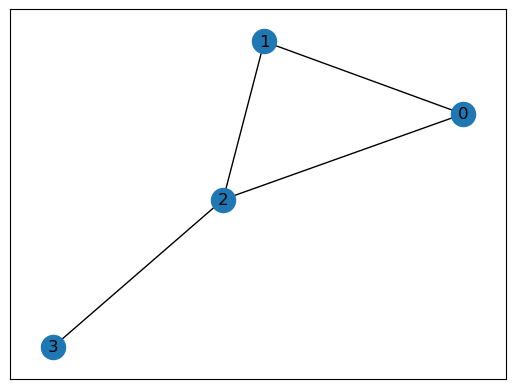

In [88]:
edgelist = [(0, 2), (1, 2), (2, 3), (0, 1)]
C = nx.Graph(edgelist)

C.nodes[0]['atom'] = 'H'
C.nodes[1]['atom'] = 'H'
C.nodes[2]['atom'] = 'N'
C.nodes[3]['atom'] = 'C'

C.edges[0, 2]['bonds'] = 1
C.edges[1, 2]['bonds'] = 1
C.edges[2, 3]['bonds'] = 2
C.edges[0, 1]['bonds'] = 1

print(C.nodes.data())
print(C.edges.data())
nx.draw_networkx(C, with_labels=True)

The graph to check for isomorphisms for in subgraphs of the toy graphs. (i.e. The functional group)

[(0, {'atom': 'H'}), (2, {'atom': 'N'}), (1, {'atom': 'H'})]
[(0, 2, {'bonds': 1}), (2, 1, {'bonds': 1})]


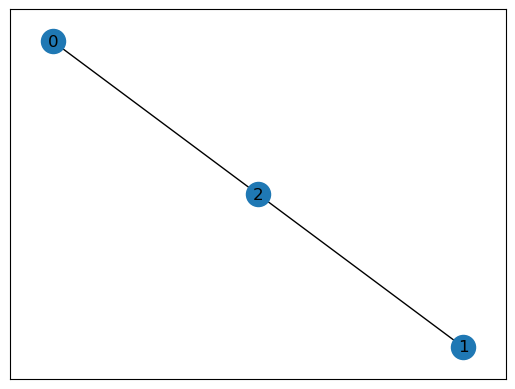

In [89]:
edgelist = [(0, 2), (1, 2)]
func_group = nx.Graph(edgelist)

func_group.nodes[0]['atom'] = 'H'
func_group.nodes[1]['atom'] = 'H'
func_group.nodes[2]['atom'] = 'N'

func_group.edges[0, 2]['bonds'] = 1
func_group.edges[1, 2]['bonds'] = 1

print(func_group.nodes.data())
print(func_group.edges.data())
nx.draw_networkx(func_group, with_labels=True)

Yield isomorphic mappings between functional_group and subgraphs of graph G:

In [104]:
def node_match(node1, node2):
    """
    Input:
    dict node1: {'atom': atom_name}
    dict node2: {'atom': atom_name}

    Output:
    bool : True if node features are the same, False otherwise
    """
    return node1['atom'] == node2['atom']

def edge_match(edge1, edge2):
    """
    Input:
    dict edge1: {'bonds': bond_count}
    dict edge2: {'bonds': bond_count}

    Output:
    bool : True if edge features are the same, False otherwise
    """
    return edge1['bonds'] == edge2['bonds']

def unique_subgraph_isomorphisms(matcher):
    """Return one representative for each unique subgraph match."""
    seen_subgraphs = set()
    unique_matches = []
    
    for mapping in matcher.subgraph_isomorphisms_iter():
        # The subgraph matched in G is just the set of G-nodes in 'mapping.keys()'.
        matched_nodes = frozenset(mapping.keys())  # Convert to a frozenset so we can store it in a set.
        
        if matched_nodes not in seen_subgraphs:
            seen_subgraphs.add(matched_nodes)
            unique_matches.append(mapping)
            
    return unique_matches

[{0: 0, 2: 2, 1: 1}]


In [109]:
isomatcher = nx.isomorphism.GraphMatcher(A, func_group, node_match=node_match, edge_match=edge_match)
matches = list(isomatcher.subgraph_isomorphisms_iter())   
print(matches)

[{0: 0, 2: 2, 1: 1}, {1: 0, 2: 2, 0: 1}]


Problem: It's counting two isomorphisms since they technically have different mapping, but chemically these are the same molecules. We resolve the issue by looking at the nodes in the mappings as a set rather than an ordered list:

In [105]:
isomatcher = nx.isomorphism.GraphMatcher(A, func_group, node_match=node_match, edge_match=edge_match)
unique_matches = unique_subgraph_isomorphisms(isomatcher)
print(unique_matches)

[{0: 0, 2: 2, 1: 1}]


Now Graph B:

In [110]:
isomatcher = nx.isomorphism.GraphMatcher(B, func_group, node_match=node_match, edge_match=edge_match)
matches = list(isomatcher.subgraph_isomorphisms_iter())   
print(matches)

[]


In [111]:
isomatcher = nx.isomorphism.GraphMatcher(B, func_group, node_match=node_match, edge_match=edge_match)
unique_matches = unique_subgraph_isomorphisms(isomatcher)
print(unique_matches)

[]


Now Graph C:

In [112]:
isomatcher = nx.isomorphism.GraphMatcher(B, func_group, node_match=node_match, edge_match=edge_match)
matches = list(isomatcher.subgraph_isomorphisms_iter())   
print(matches)

[]


In [113]:
isomatcher = nx.isomorphism.GraphMatcher(B, func_group, node_match=node_match, edge_match=edge_match)
unique_matches = unique_subgraph_isomorphisms(isomatcher)
print(unique_matches)

[]


Let's count now.

In [116]:
def count_node_induced_subgraph_isomorphisms(G, SG):
    """
    Input:
    G: networkx graph to searh
    SG: networkx subgraph that will be search for in G

    Output:
    count: int, number of isomorphisms found 
    """

    isomatcher = nx.isomorphism.GraphMatcher(G, SG, node_match=node_match, edge_match=edge_match)
    unique_mappings = unique_subgraph_isomorphisms(isomatcher)
    count = len(unique_mappings)

    # TODO: Return the nodes/edges in G that are isomorphic to SG

    return count, unique_mappings

In [120]:
count_node_induced_subgraph_isomorphisms(A, func_group)

(1, [{0: 0, 2: 2, 1: 1}])

I need to test this algorithm now somehow. I should come up with edge cases. Or alternatively, maybe I can mathematically prove the correctness of this algorithm somehow.